# Quais jogos tem sucesso? Quais são os padrões que determinam esse sucesso? E quais padrões determinam o fracasso?

Você trabalha para a loja online Ice, que vende videogames no mundo todo. As avaliações de usuários e especialistas, gêneros, plataformas (por exemplo, Xbox ou PlayStation) e dados históricos sobre vendas de jogos estão disponíveis em fontes abertas. Você precisa identificar padrões que determinam se um jogo tem sucesso ou não. Isso permitirá que você identifique potenciais grandes vencedores e planeje campanhas publicitárias.
Na sua frente estão dados que remontam a 2016. Vamos imaginar que estamos em dezembro de 2016 e você está planejando uma campanha para 2017.
(O importante é ter experiência trabalhando com dados. Realmente não importa se você está prevendo as vendas de 2017 com base nos dados de 2016 ou as vendas de 2027 com base nos dados de 2026.)
O conjunto de dados contém a abreviatura ESRB. O Entertainment Software Rating Board avalia o conteúdo de um jogo e atribui uma classificação etária, como Adolescente ou Maduro.

## Inicialização.

Bibliotecas que serão utilizadas no projeto

In [1]:
# Para manipulação de dados
import pandas as pd

# Para estatisticas 
from scipy import stats as st

# Para gráficos 
import matplotlib.pyplot as plt 

# Para operações matemáticas 
import numpy as np

## Carregando os dados.

Leitura dos arquivos que serão utilizados

In [2]:
# Lendo o arquivo csv
try:
    games = pd.read_csv('/datasets/games.csv')
except:
    games = pd.read_csv('games.csv')

## Visualização dos dados.

Uma olhada nas informações gerais do dataset

In [3]:
# Visualizandos as 10 primeiras linhas da tabela
games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
# Visualizandos as 10 ultimas linhas da tabela
games.tail(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16705,15 Days,PC,2009.0,Adventure,0.00,0.01,0.00,0.0,63.0,5.8,NaN
16706,Men in Black II: Alien Escape,GC,2003.0,Shooter,0.01,0.00,0.00,0.0,NaN,tbd,T
16707,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16708,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16709,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,0.00,0.00,0.00,0.0,NaN,NaN,NaN
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


In [5]:
# Verificando as informações gerais dataframe
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
# Verificando o número total de valores ausentes por coluna
games.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [7]:
# Verficando a quantidade de valores duplicados
games.duplicated().sum()

0

## Preparando os dados.

### Substituir os nomes das colunas (transformar tudo em minúsculos).

In [8]:
# Substituindo nome das colunas para letras minúsculas
games.columns = games.columns.str.lower()
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [9]:
# Substituindo valores da coluna 'name' para minusculas
games['name'] = games['name'].str.lower()

# Substituindo valores da coluna 'platform' para minusculas
games['platform'] = games['platform'].str.lower()

# Substituindo valores da coluna 'genre' para minusculas
games['genre'] = games['genre'].str.lower()

# Substituindo valores da coluna 'rating' para minusculas
games['rating'] = games['rating'].str.lower()

## Se necessário, decida como lidar com valores ausentes

In [10]:
games.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [11]:
# Substituindo valores nulos da coluna 'name' para 'unknown'
games['name'] = games['name'].fillna('unknown')
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Substituir valores ausentes da coluna 'year_of_release' para média de acordo com a plataforma pois nela não existe valores ausentes

In [12]:
# Criando um agrupamento e transformando ela em um dicionário com o to_dict
plat_year = games.groupby('platform')['year_of_release'].median().to_dict()
# Criando função para substituir os valores nulos do ano de lançamento pela mediana do ano baseado na plataforma
def year_median_au(x):
    # vendo se é um valor nulo
    if np.isnan(x['year_of_release']):
        # Pegando a mediana do ano baseada na platarforma
        return plat_year.get(x['platform'])
    
    else:
        # Retornando apenas o ano para valores que não estão ausentes
        return x['year_of_release']
# Aplicando a função e usando o axis=1 para aplicar linha a linha
games['year_of_release'] = games.apply(year_median_au,axis=1)
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


## Converta os dados para os tipos necessários.

In [13]:
# Convertendo o tipo de float para int
games['year_of_release'] = games['year_of_release'].astype('int')

## Descreva as colunas onde os tipos de dados foram alterados e por quê.

Houve a conversão do tipo do dado da coluna 'year_of_release' para termos uma melhor representação dela.

## Se necessário, decida como lidar com valores ausentes


In [14]:
games.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [15]:
# Pegando os valores nulos da coluna genre
genre_del = games.loc[games['genre'].isnull()]
# Apagando as 2 linhas com valores ausentes
games = games.drop(genre_del.index)
games.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

In [16]:
# Criando um agrupamento e transformando ela em um dicionário com o to_dict
plat_year = games.groupby('genre')['critic_score'].median().to_dict()
# Criando função para substituir os valores nulos do critic_score de lançamento pela mediana do ano baseado na genre
def critic(x):
    # vendo se é um valor nulo
    if np.isnan(x['critic_score']):
        # Pegando a mediana do ano baseada na genre
        return plat_year.get(x['genre'])
    
    else:
        # Retornando apenas o ano para valores que não estão ausentes
        return x['critic_score']
# Aplicando a função e usando o axis=1 para aplicar linha a linha
games['critic_score'] = games.apply(critic,axis=1)
games.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score         6699
rating             6764
dtype: int64

In [17]:
games['user_score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

In [18]:
# Substituindo o valor 'tbd' para nulo
games['user_score'].replace('tbd', np.nan, inplace=True)
# transformando o valor em float pois quando foi usado o replace ele se trnasformou em object
games['user_score'] = games['user_score'].astype('float')
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int32  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.5+ MB


In [19]:
# Criando um agrupamento e transformando ela em um dicionário com o to_dict
plat_year = games.groupby('genre')['user_score'].median().to_dict()
# Criando função para substituir os valores nulos do user_score de lançamento pela mediana do ano baseado na genre
def user_score(x):
    # vendo se é um valor nulo
    if np.isnan(x['user_score']):
        # Pegando a mediana do ano baseada na genre
        return plat_year.get(x['genre'])
    
    else:
        # Retornando apenas o ano para valores que não estão ausentes
        return x['user_score']
# Aplicando a função e usando o axis=1 para aplicar linha a linha
games['user_score'] = games.apply(user_score,axis=1)
games.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score            0
rating             6764
dtype: int64

In [20]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int32  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16713 non-null  float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.5+ MB


In [21]:
# Criando um agrupamento e transformando ela em um dicionário com o to_dict
plat_year = games.groupby('genre')['rating'].agg(pd.Series.mode).to_dict()
# Criando função para substituir os valores nulos do rating de lançamento pela mediana do ano baseado na genre
def rating(x):
    # vendo se é um valor nulo
    if pd.isna(x['rating']):
        # Pegando a mediana do ano baseada na genre
        return plat_year.get(x['genre'])
    
    else:
        # Retornando apenas o ano para valores que não estão ausentes
        return x['rating']
# Aplicando a função e usando o axis=1 para aplicar linha a linha
games['rating'] = games.apply(rating,axis=1)
games.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

### Explique por que você preencheu os valores ausentes da forma que você fez ou por que você decidiu deixá-los em branco.

Eu preenche os dados ausentes para conseguir ter uma analise mais apurada. 

### Por que acha que os valores estão ausentes? Dê possíveis razões.

- Para coluna `year_of_release` deve ter tido algum problema na formação dos dados ou coleta deles.
- Nas demais colunas creio que houve a falta de inserção desses dados, por exemplo na coluna `user_score` deve ter falta de analises dos usuarios neste jogos que estão ausentes. Em geral, consumidores dão nota com pouca frequencia.

### Calcule o total de vendas (a soma das vendas em todas as regiões) para cada jogo e coloque esses valores em uma coluna separada.

In [22]:
games['revenue_total_regions'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,revenue_total_regions
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,e,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,69.0,7.7,e,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,e,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,e,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,74.0,7.8,t,31.38


## Analise os dados

### Veja quantos jogos foram lançados em anos diferentes. Os dados de cada período são significativos?

In [23]:
# Criando uma pivot_table com o ano e a quantidades de jogos lançadas por ano
games_year = games.pivot_table(index='year_of_release',
                               values='name',
                               aggfunc='count').rename(columns={
                                   'name': 'count'
                               }).reset_index()
# Ordenando a coluna 'count' para ver os anos com mais lançamentos
games_year.sort_values(by='count', ascending=False)

,year_of_release,count
29,2009,1476
28,2008,1457
30,2010,1302
27,2007,1197
31,2011,1161
26,2006,1006
25,2005,973
22,2002,829
23,2003,800
24,2004,783


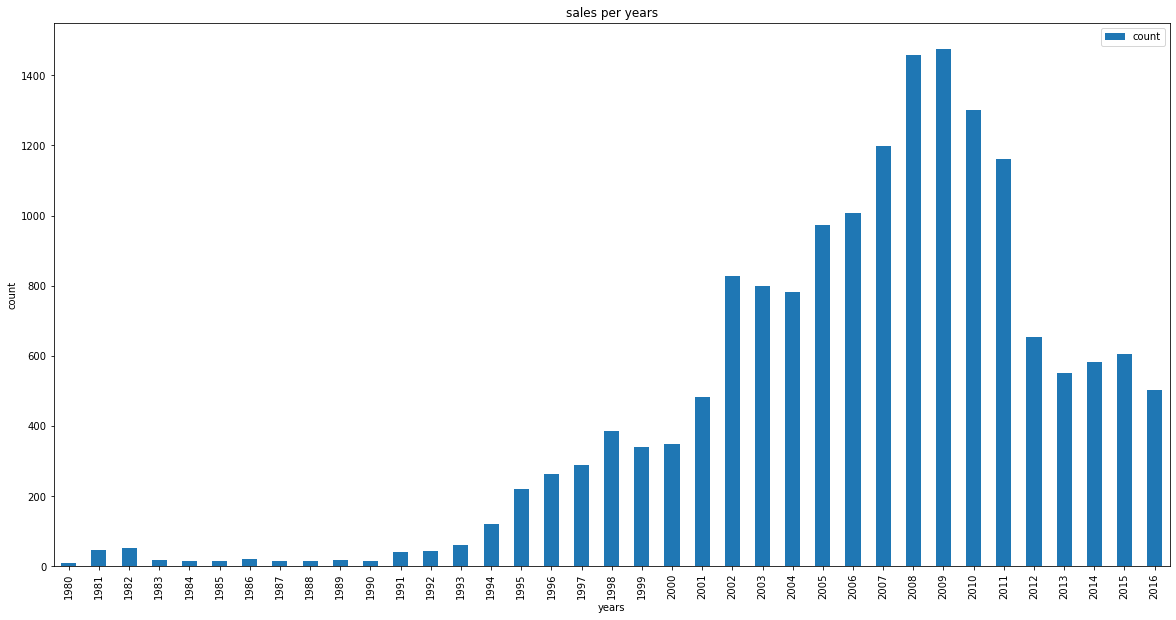

In [24]:
# Criando gráfico de barra
games_year.plot(kind='bar',x='year_of_release',y='count',figsize=(20,10))
plt.title('sales per years')
plt.xlabel('years')
plt.ylabel('count')
plt.show()

Podemos ver um crescimento no ano de 1994 quando ele dobra o número jogos lançados comparado ao ano anterior, logo após isso temos 2002 como um marco grandioso supernado até anos seguinte em número de lançamentos de jogos, mas não são todos os periodos que temos uma diferença significativa temos por exemplo os anos de 1989 e 1983 com a mesma quantidade de jogos lançados que são 17.

### Veja como as vendas variaram de plataforma para plataforma. Escolha as plataformas com as maiores vendas totais e construa uma distribuição com base em dados para cada ano. Encontre as plataformas que costumavam ser populares, mas agora não têm vendas. Quanto tempo leva para as novas plataformas aparecerem e as antigas desaparecerem?

In [25]:
# Criando pivot_table para saber o total de vendas por plataforma e deixa-lás ordenadas
platform_sales = games.pivot_table(index='platform',
                                   values='revenue_total_regions',
                                   aggfunc='sum').sort_values(
                                       by='revenue_total_regions',
                                       ascending=False)
top_4 = platform_sales.head(4)
top_4

,revenue_total_regions
platform,
ps2,1255.77
x360,971.42
ps3,939.65
wii,907.51


In [26]:
# Criando pivot_table para saber os anos que as principais plataformas duram
platform_sales_years = games.pivot_table(index=['platform','year_of_release'],
                                   values='revenue_total_regions',
                                   aggfunc='sum').sort_values(by='revenue_total_regions').reset_index()
platform_sales_years.tail()

,platform,year_of_release,revenue_total_regions
233,ps2,2005,182.87
234,ps2,2003,184.31
235,ps2,2002,205.38
236,ps2,2004,211.81
237,wii,2009,223.30


In [27]:
# Filtrando para obter as top 4 plataformas
ps2 = platform_sales_years.loc[platform_sales_years['platform']=='ps2']
x360 = platform_sales_years.loc[platform_sales_years['platform']=='x360']
ps3 = platform_sales_years.loc[platform_sales_years['platform']=='ps3']
wii = platform_sales_years.loc[platform_sales_years['platform']=='wii']

In [28]:
# Calculando a média de anos que as principais plataformas tiveram vendas
median_0sales = (len(ps2)+len(x360)+len(ps3)+len(wii))/4
median_0sales

11.5

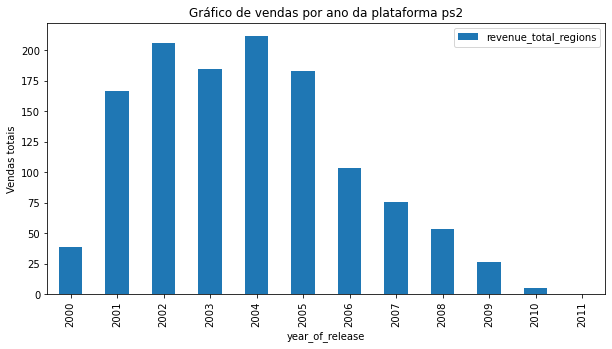

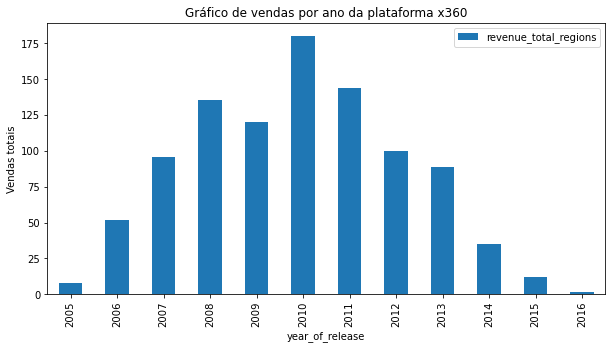

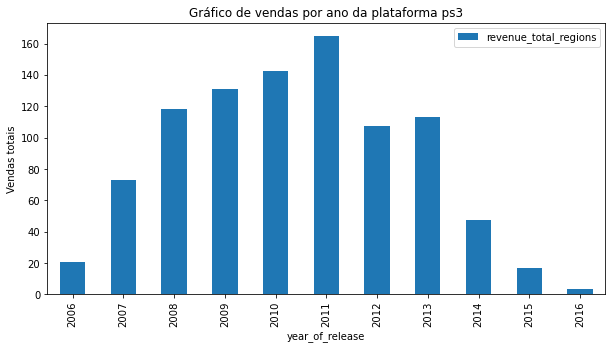

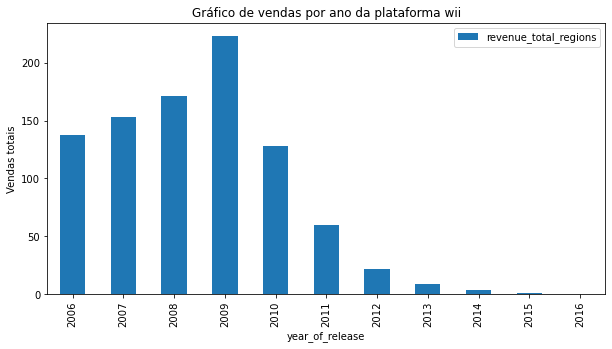

In [29]:
# Fazendo laço for para imprimir gráfico de vendas por ano
for top in top_4.index:
    # Pegando as linhas da tabela games que tem as plataformas iguais a tabela top
    fatia = games[games['platform'] == top]
    # Craindo pivot_table e plotando o gráfico
    fatia.pivot_table(index='year_of_release',
                      values='revenue_total_regions',
                      aggfunc='sum').plot(kind='bar', figsize=(10, 5))
    plt.title(f"Gráfico de vendas por ano da plataforma {top}")
    plt.ylabel('Vendas totais')
    plt.show()

As plataformas tem uma duração média de 11 anos, e o tempo para uma nova plataforma surgir e outra desaparecer é de cerca de 7 anos.

### Determine para qual período você deve pegar dados. Para fazê-lo, olhe para suas respostas para as perguntas anteriores. Os dados te deveriam permitir construir um modelo para 2017.

Vamos lidar com o ano de 2002 para frente pois a partir desse ano obvemos os maiores resultados de vendas, e temos uma distribution shift.

### Trabalhar apenas com os dados que você decidiu que são relevantes. Desconsidere os dados de anos anteriores.

In [30]:
# Filtrando dados apartir de 2002
games_2002 = games[games['year_of_release']>=2002]

### Quais plataformas estão liderando em vendas? Quais estão crescendo ou diminuindo? Selecione várias plataformas potencialmente lucrativas.

In [31]:
# Criando pivot table para ver as plafarmos com jogos mais vendidos
games_2002.pivot_table(index='platform',
                       values='revenue_total_regions',
                       aggfunc='sum').sort_values(by='revenue_total_regions',
                                                  ascending=False)

,revenue_total_regions
platform,
ps2,1050.17
x360,971.42
ps3,939.65
wii,907.51
ds,806.10
ps4,314.14
psp,294.05
3ds,259.00
gba,256.25


In [32]:
# Criando pivot table para ver as plafarmos com jogos mais vendidos
revenue_games_2015 = games_2002.pivot_table(
    index=['platform', 'year_of_release'],
    values='revenue_total_regions',
    aggfunc='sum').sort_values(by='revenue_total_regions').reset_index()
# Filtrando anos apartir de 2015 para ver qual tem maior número de jogos vendidos mais recentemente
revenue_games_2015[revenue_games_2015['year_of_release'] > 2015].sort_values(
    by=['revenue_total_regions', 'year_of_release'], ascending=False)

,platform,year_of_release,revenue_total_regions
94,ps4,2016,69.25
62,xone,2016,26.15
47,3ds,2016,15.14
24,pc,2016,5.25
22,wiiu,2016,4.60
20,psv,2016,4.25
18,ps3,2016,3.60
12,x360,2016,1.52
4,wii,2016,0.18


As plataformas que lideram em vendas são a partir de 2002: ps2, x360, ps3, wii.
Mais recentemente tivemos o crescimento de duas plataformas xone e ps4 e atualmente elas são as mais lucrativas estando um pouco atrás o 3ds.

### Construa um diagrama de caixa para as vendas globais de todos os jogos, divididos por plataforma. As diferenças nas vendas são significativas? E quanto às vendas médias em várias plataformas? Descreva suas descobertas.

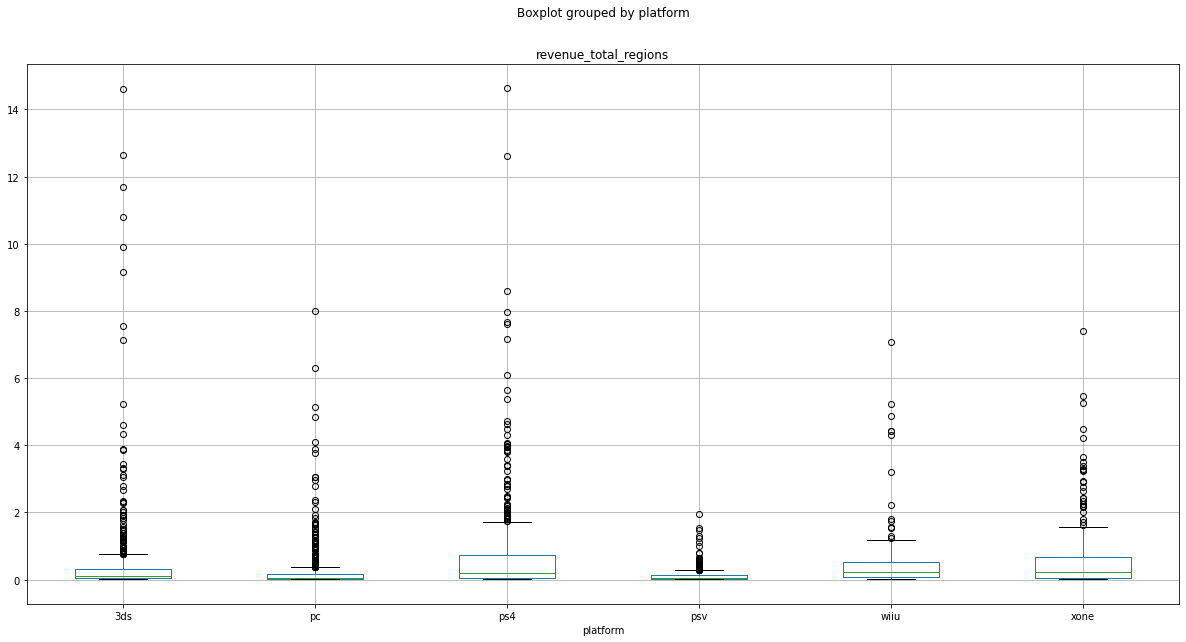

In [33]:
# Pegando as principais plataformas
princ_plat_sales = games_2002[games_2002['platform'].isin(['ps4','xone','3ds','pc','wiiu','psv'])]
# Plotando gráfico de caixa
princ_plat_sales.boxplot(column='revenue_total_regions',by='platform',figsize=(20,10))
plt.show()

Temos medianas semelahntes para ps4, xone e wiiu. Para os demais temos uma mediana mais baixa, também temos valores atipicos nas platafromas 3ds e ps4 principalmente

### Veja como as avaliações de usuários e profissionais afetam as vendas de uma plataforma popular (você escolhe). Construa um gráfico de dispersão e calcule a correlação entre revisões e vendas. Tire conclusões.

In [34]:
# Pegando as plataformas mais populares
xone_ps4 = games_2002[games_2002['platform'].isin(['ps4','xone'])]
ps4 = xone_ps4[xone_ps4['platform']=='ps4']
xone = xone_ps4[xone_ps4['platform']=='xone']

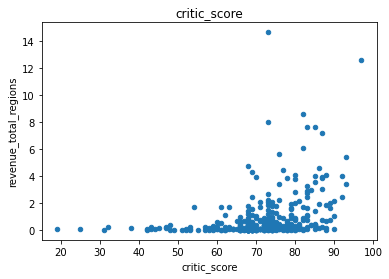

In [35]:
# Plotando gráfico de dispersão
ps4.plot(x='critic_score',y='revenue_total_regions',kind='scatter')
plt.title('critic_score')
plt.show()

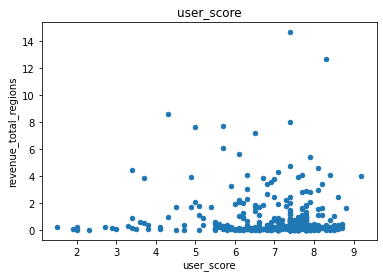

In [36]:
# Plotando gráfico de dispersão
ps4.plot(x='user_score',y='revenue_total_regions',kind='scatter')
plt.title('user_score')
plt.show()

In [37]:
# Vendo a correlação entre reviões e vendas
print(ps4['critic_score'].corr(ps4['revenue_total_regions']))
print(ps4['user_score'].corr(ps4['revenue_total_regions']))

0.3514080244775845
-0.06548195077585676


Não temos uma correlação forte entre as vendas e as reviões no ps4

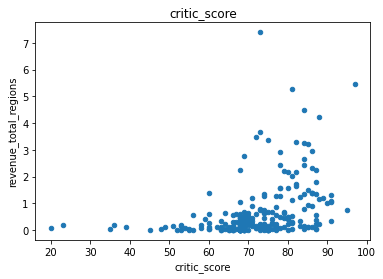

In [38]:
# Plotando gráfico de dispersão
xone.plot(x='critic_score',y='revenue_total_regions',kind='scatter')
plt.title('critic_score')
plt.show()

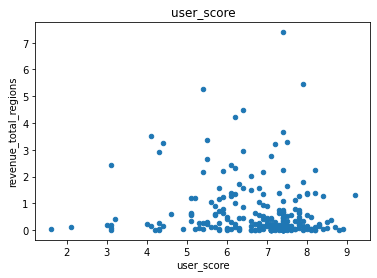

In [39]:
# Plotando gráfico de dispersão
xone.plot(x='user_score',y='revenue_total_regions',kind='scatter')
plt.title('user_score')
plt.show()

In [40]:
# Vendo a correlação entre reviões e vendas
print(xone['critic_score'].corr(xone['revenue_total_regions']))
print(xone['user_score'].corr(xone['revenue_total_regions']))

0.3786581617346427
-0.10515664470960723


Obtivemos um resultado semelhante ao do ps4, também não temos uma correção relevante entre as revisões e as vendas

### Dê uma olhada na distribuição geral de jogos por gênero. O que podemos dizer sobre os gêneros mais lucrativos? Você pode generalizar sobre gêneros com vendas altas e baixas?

In [41]:
# Vendo os generos quem mais aparecem no nosso dataframe
games_2002['genre'].value_counts(ascending=False)

action          3020
sports          1840
misc            1580
role-playing    1246
adventure       1164
shooter         1098
racing           941
simulation       741
platform         662
fighting         604
strategy         523
puzzle           460
Name: genre, dtype: int64

In [42]:
# Criando pivot_table com o total de vendas por genero
genre_sales = games_2002.pivot_table(index='genre',
                                     values='revenue_total_regions',
                                     aggfunc='sum').sort_values(
                                         by='revenue_total_regions',
                                         ascending=False).reset_index()
genre_sales

,genre,revenue_total_regions
0,action,1456.05
1,sports,1057.49
2,shooter,888.64
3,misc,698.63
4,role-playing,683.30
5,racing,489.52
6,platform,440.23
7,simulation,314.51
8,fighting,277.94
9,adventure,174.40


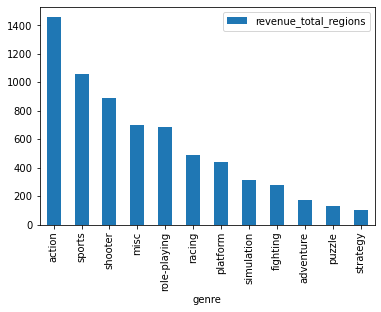

In [43]:
# Plotando o gráfico
genre_sales.plot(kind='bar',x='genre')
plt.show()

Os gêneros mais lucrativos são ação e esporte, podemos ver que esses também são os gêneros que são mais desenvolvidos.

## Criar um perfil de usuário para cada região

### As cinco plataformas principais. Descreva as variações das suas quotas de mercado de região para região.

In [44]:
# Criando variavel para armazenar as regiões
col = ['na_sales', 'eu_sales', 'jp_sales']
# Usando o for para iterar sobre cada região e criar uma pivot_table sobre elas
for i in col:
    print('{}'.format(i))
    print(
        games_2002.pivot_table(index='platform', values=i,
                               aggfunc='sum').sort_values(
                                   by=i,
                                   ascending=False).reset_index().head(4))
    print('')

na_sales
  platform  na_sales
0     x360    602.47
1      wii    496.90
2      ps2    488.27
3      ps3    393.49

eu_sales
  platform  eu_sales
0      ps3    330.29
1      ps2    276.28
2     x360    270.76
3      wii    262.21

jp_sales
  platform  jp_sales
0       ds    175.55
1      ps2    112.54
2      3ds    100.67
3      ps3     80.19



Existem grandes diferenças entre as regiões,e podemos ver uma diferença maior ainda na coluna `jp_sales`

### Os cinco principais gêneros. Explique a diferença.

In [45]:
# Criando variavel para armazenar as regiões
col = ['na_sales','eu_sales','jp_sales']
# Usando o for para iterar sobre cada região e criar uma pivot_table sobre elas
for i in col:
    print('{}'.format(i))
    print(games_2002.pivot_table(index='genre',values=i,aggfunc='sum').sort_values(by=i,ascending=False).reset_index().head(4))
    print('')

na_sales
     genre  na_sales
0   action    716.91
1   sports    549.64
2  shooter    480.26
3     misc    355.87

eu_sales
     genre  eu_sales
0   action    443.93
1   sports    320.54
2  shooter    286.97
3     misc    189.69

jp_sales
          genre  jp_sales
0  role-playing    218.09
1        action    123.79
2          misc     82.49
3        sports     66.06



Agora temos uma semelhança nas vendas entre as colunas `na_sales` e `eu_sales`, e mais uma vez vemos uma disparidade da coluna `jp_sales` para as demais regiões.

### As classificações do ESRB afetam as vendas em regiões individuais?

In [46]:
# Criando variavel para armazenar as regiões
col = ['na_sales','eu_sales','jp_sales']
# Usando o for para iterar sobre cada região e criar uma pivot_table sobre elas
for i in col:
    print('{}'.format(i))
    print(games_2002.pivot_table(index=['rating','genre','platform'],values=i,aggfunc='sum').sort_values(by=i,ascending=False).reset_index().head(4))
    print('')

na_sales
  rating    genre platform  na_sales
0      m  shooter     x360    156.72
1      e   sports      wii    134.60
2      e   sports      ps2     98.17
3      m  shooter      ps3     74.00

eu_sales
  rating    genre platform  eu_sales
0      e   sports      wii     89.67
1      m  shooter     x360     68.50
2      m  shooter      ps3     65.66
3      m   action      ps3     54.63

jp_sales
  rating         genre platform  jp_sales
0      t  role-playing      3ds     38.61
1      e          misc       ds     37.17
2      t  role-playing       ds     30.10
3      t  role-playing      psp     28.34



Podemos ver que no japão o rating dominante é o t e na europa temos o m, assim podemos chegar a conclusão que no japão e na europa as classificações ESRB afetam as vendas.

## Teste as seguintes hipóteses:

### As classificações médias dos usuários das plataformas Xbox One e PC são as mesmas.

- **Hipotese nula:** As classificações médias dos usuários das plataformas Xbox One e PC são as mesmas.
- **Hipotese alternativa:** As classificações médias dos usuários das plataformas Xbox One e PC são as diferentes.

In [47]:
# Criando tabelas para as platafromas xbox one e pc
xbox_hip = games_2002[games_2002['platform']=='xone']
pc_hip = games_2002[games_2002['platform']=='pc']

In [48]:
# Verificando a variancia
np.var(xbox_hip['user_score'])

1.5664154469012763

In [49]:
# Verificando a variancia
np.var(pc_hip['user_score'])

1.9047498148468716

In [50]:
# Definindo nível crítico de significância estatística
alpha = 0.05

# Testando as hipóteses das duas populações e colando que as variancias são iguais
results = st.ttest_ind(xbox_hip['user_score'],pc_hip['user_score'],equal_var=True)
                     
# Imprimindo o valor-p obtido
print('p-value:',results.pvalue)

# Comparando o valor-p obtido com o nível de significância
if (results.pvalue > alpha):
    print("Nós não podemos rejeitar a hipótese nula")
else:
    print("Nós rejeitamos a hipótese nula")

p-value: 0.0004020073033864229
Nós rejeitamos a hipótese nula


A hipótese nula foi rejeitada então podemos concluir que as classificações médias dos usuários das plataformas Xbox One e PC provavelmente são as diferentes.

### As classificações médias de usuários para os gêneros Action (ação) e Sports (esportes) são diferentes.

- **Hipotese nula:** As classificações médias de usuários para os gêneros Action (ação) e Sports (esportes) são iguais.
- **Hipotese alternativa:** As classificações médias de usuários para os gêneros Action (ação) e Sports (esportes) são diferentes.

In [51]:
# Criando tabelas para as platafromas xbox one e pc
action_hip = games_2002[games_2002['genre']=='action']
sports_hip = games_2002[games_2002['genre']=='sports']

In [52]:
# Verificando a variancia
np.var(action_hip['user_score'])

1.190578434059879

In [53]:
# Verificando a variancia
np.var(sports_hip['user_score'])

1.5443566989603443

In [54]:
# Definindo nível crítico de significância estatística
alpha = 0.05

# Testando as hipóteses das duas populações e colando que as variancias são iguais
results = st.ttest_ind(action_hip['user_score'],sports_hip['user_score'],equal_var=True)
                     
# Imprimindo o valor-p obtido
print('p-value:',results.pvalue)

# Comparando o valor-p obtido com o nível de significância
if (results.pvalue > alpha):
    print("Nós não podemos rejeitar a hipótese nula")
else:
    print("Nós rejeitamos a hipótese nula")

p-value: 0.07717853111668925
Nós não podemos rejeitar a hipótese nula


A hipotese nula foi aceita então podemos ver que provavelmente as classificações médias de usuários para os gêneros Action (ação) e Sports (esportes) são iguais.

## Conclusão Geral

Podemos tratar a tabela lidando com os valores ausentes, mudando os tipos dos dados, analisamos os dados e criamos insights, criamos um perfil para usuarios de cada região e fizemos testes de hipóteses.